# K Means Clustering: An Iterative Approach

Given a dataset *d*, automatically segment the aggregate sets such that data points fall into *k* number distinct clusters. 

A cluster is defined as any data group which demonstrates greater in-group similarity than out-of-group similarity; i.e., members of a cluster must have a commonality that members of other clusters do not. 

Think of this as a nationalistic algorithm: citizens of Country A (Cluster A) have attributes in common, and it is this algorithm's job to find them. Perhaps these people (data samples) speak the same language, or enjoy the same food, or observe the same national holidays. These commonalities are what will be found. 

What is "similarity"? That is another consideration. In this notebook, we will use Euclidean distance as the similarity metric. In other words, samples will be arranged spatially and evaluated on the basis of their coordinates. 

First, let's do some housekeeping. 

In [85]:
# Start by tidying the workspace. Delete any old variables. -f is for 'force', so Jupyter will not ask permission. 
%reset -f

In [86]:
# Next, import dependencies. Instruct matplotlib to display plots inline (rather than in separate windows)
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from random import randint
from math import sqrt
from IPython import display
%matplotlib inline 

Next, we'll import the dataset, which is a .csv file that is included in the Data directory. This script would theroretically work with any two-dimensional dataset, that is, and .csv from which two variables were selected. 

In [87]:
# Load data into a pandas dataframe
df = pd.read_csv('../Data/mall_customers.csv')

In [88]:
# Shall we shuffle the dataset? This is not strictly necessary for k means clustering. 
shuffle_on = False
if shuffle_on:
    df = df.sample(frac=1)

In [89]:
# Print data dimensionality to get our bearings. Then display first few rows
print('Numpy shape:', df.shape)
print('Number of data examples:', df.shape[0])
print('Number of data featrues:', df.shape[1])
print('Number of dimensions:', df.ndim)
df.head()

Numpy shape: (200, 5)
Number of data examples: 200
Number of data featrues: 5
Number of dimensions: 2


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [90]:
# Display summary statistics of the data. This includes basics like mean, min, max, and standard deviation
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [91]:
# Define dataset from existing dataframe
x = df['Age'].to_numpy()
y = df['Annual Income (k$)'].to_numpy()

print(type(x), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [92]:
# Set desired number of clusters. This could, in theory, be any positive integer. 
k = 4

In [93]:
def initialize_centroids(x_data, y_data, k):
    """Randomly instantiate centroids and return their coordinates in separate lists for x and y components.
    
    Generates k number centroids at random locations within range of the data, which is 
    calculated and then reduced by 20%. This reduction is specified by the local variable
    'margin' and prevents cluster centroids from instantiating at the edge of the set, which 
    is less than optimal for the k means algorithm. 

    Args:
        x_data (numpy.ndarray): data for independent variable.
        y_data (numpy.ndarray): data for dependent variable.
        k (int): desired number of centroids/clusters.

    Returns:
        initial_centroids_x_coords: a list of length k, where each element is the x-coordinate of a centroid.
        initial_centroids_y_coords: a list of length k, where each element is the y-coordinate of a centroid.

    """
    x_max = np.amax(x_data) 
    x_min = np.amin(x_data)
    y_max = np.amax(y_data)
    y_min = np.amin(y_data)
    margin = 0.20 # Precludes centroids at edge of data range
    
    initial_centroids_x_coords = [] # List of x coordinates of all centroids
    initial_centroids_y_coords = [] # List of y coordinates of all centroids

    for i in range(k):
        initial_centroids_x_coords.append(randint(x_min, x_max)*(1-margin))
        initial_centroids_y_coords.append(randint(y_min, y_max)*(1-margin))

    return initial_centroids_x_coords, initial_centroids_y_coords

# Set number of clusters 
k_x, k_y = initialize_centroids(x, y, k)
print('Centroid coordinates:')
for j in range(k):
    print(k_x[j],', ',k_y[j], sep='')
    
print(type(k_x), type(k_y))
print(len(k_x))
print(len(x))
print(len(y))

Centroid coordinates:
25.6, 37.6
28.0, 18.400000000000002
23.200000000000003, 93.60000000000001
49.6, 59.2
<class 'list'> <class 'list'>
4
200
200


In [94]:
# Make an empty numpy array of size k x len(x) to store distances to centroids
# Build in extra row for the minimum distance value
d = np.zeros([k + 1, len(x)])
d.shape

(5, 200)

In [95]:
def find_distance(x1, y1, x2, y2):
    """Find Euclidean distance between a point (x1, y1) and another point (x2, y2).
    
    In the context of k means clustering, for a given set containing data points of the form (x, y),
    find the distance between every point in that set and every centroid's point (of the form k_x, k_y).

    Args:
        x1 (int or float): x coordinate of first point.
        y1 (int or float): y coordinate of first point.
        x2 (int or float): x coordinate of second point.
        y2 (int or float): y coordinate of second point.

    Returns:
        distance: as a float. 

    """
    distance = sqrt((x1 - x2)**2 + (y1 - y2)**2)
    return distance

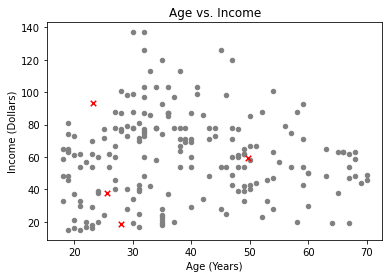

In [96]:
# Visualize data (grey) and starting centroid locations (red)
figure(facecolor='w')
plt.scatter(x, y, s=20, color='grey')
plt.scatter(k_x, k_y, s = 30, color='red', marker='x')
plt.title('Age vs. Income')
plt.xlabel('Age (Years)')
plt.ylabel('Income (Dollars)')
plt.show()

In [97]:
print(len(x))

200


In [98]:
# Iteratively find the distance between every point and every center. 
# Construct array d containing distances from every point to every centroid
# Rows (except last) = distances from data points to each centroid k_n
# Last Row of d = min(column), ie distances of data points to closes centroid
# Col of d = distance from datapoint m to each centroid k_n, min is last row

def make_clusters(x, y, k, d):
    clusters = {}
    for j in range(len(x)): #200
        min_distance = 9999999999 # Arbitrarily large number 
        x_i, y_i = x[j], y[j] # Select (x, y) coords of one data point at a time
        for i in range(0, k): # k = number of clusters
            k_xi, k_yi = k_x[i], k_y[i] # Coordinates of the centroids 
            distance = find_distance(x_i, y_i, k_xi, k_yi)
            if distance < min_distance:
                min_distance = distance 
                centroid_coords = k_xi, k_yi
            d[i,j] = distance

        try: 
            clusters[centroid_coords].append(tuple([x_i, y_i]))
        except KeyError:
            clusters[centroid_coords] = [tuple([x_i, y_i])]

        # Uncomment below to see a printout of data points and their nearest centroids. 
        # print("Datapoint:",j,", x:",x_i,", y:",y_i,", Minimum distance:",min_distance, ", Nearest_centroid:", centroid_coords)

        col = d[:k,j]
        alt_min_distance = np.amin(col)
        d[k,j] = alt_min_distance
        
    return clusters

from collections import OrderedDict
clusters = make_clusters(x, y, k, d)
print('TYPE of clusters:',type(clusters))
print(clusters.keys())

TYPE of clusters: <class 'dict'>
dict_keys([(28.0, 18.400000000000002), (25.6, 37.6), (49.6, 59.2), (23.200000000000003, 93.60000000000001)])


In [99]:
# print("Number of entries in clusters dict:", len(clusters), "; Keys:",clusters.keys())
# print("Centroid coords:")
# for i in range(k):
#     print(k_x[i], k_y[i])

In [100]:
def mean(lst):
    pass
    # return sum(lst)/len(lst)

In [101]:
def make_centers(k, clusters):
    centers = []
    for i in range(k):
        m_x = 0
        m_y = 0
        items = 0
        for coord in clusters[k_x[i], k_y[i]]:
            items +=1 
            m_x += coord[0]
            m_y += coord[1]
        m_x = m_x/items
        m_y = m_y/items
        centers.append((m_x,m_y))
    return centers

centers = make_centers(k, clusters)
#print(centers)

In [102]:
def get_individual_cluster(clusters, index):
    """Extracts key, value pairs for each entry in a dictionary, one at a time. The purpose is to extract centroid coordinates
    and member data points for each cluster contained in clusters, such that a plot_clusters may accept one cluster
    at a time. 

    Args:
        clusters (dict): a dictionary containing centroid coordinates (as keys) and datapoints which have been
        assigned to that centroid's cluster (as values)
            key (tuple of the form x, y): coordinates of a centroid
            value (list of tuples): each is a list of variable length containing member data coordinates like (x, y)

    Returns:
        one cluster: as a key, containing centroid coords, and a value, containing cluster member coordinates

    """
    
    

Coord (member data pt): (23, 29) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (21, 30) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (18, 33) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (49, 33) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (21, 33) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (42, 34) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (30, 34) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (36, 37) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (20, 37) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (24, 38) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (31, 39) type: <class 'tuple'>
Guardian centro

Coord (member data pt): (36, 87) type: <class 'tuple'>
Guardian centroid coords: 23.200000000000003 , 93.60000000000001
Coord (member data pt): (32, 87) type: <class 'tuple'>
Guardian centroid coords: 23.200000000000003 , 93.60000000000001
Coord (member data pt): (40, 87) type: <class 'tuple'>
Guardian centroid coords: 23.200000000000003 , 93.60000000000001
Coord (member data pt): (28, 87) type: <class 'tuple'>
Guardian centroid coords: 23.200000000000003 , 93.60000000000001
Coord (member data pt): (36, 87) type: <class 'tuple'>
Guardian centroid coords: 23.200000000000003 , 93.60000000000001
Coord (member data pt): (36, 87) type: <class 'tuple'>
Guardian centroid coords: 23.200000000000003 , 93.60000000000001
Coord (member data pt): (30, 88) type: <class 'tuple'>
Guardian centroid coords: 23.200000000000003 , 93.60000000000001
Coord (member data pt): (27, 88) type: <class 'tuple'>
Guardian centroid coords: 23.200000000000003 , 93.60000000000001
Coord (member data pt): (35, 93) type: <

Coord (member data pt): (38, 67) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (40, 69) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (39, 69) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (31, 70) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (43, 71) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (40, 71) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (59, 71) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (38, 71) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (47, 71) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (39, 71) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (31, 72) type: <class 'tuple'>
Guardian centro

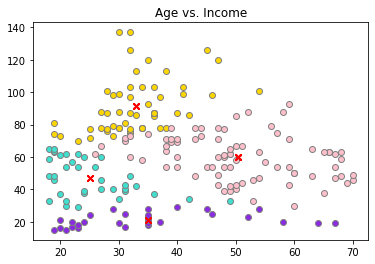

In [103]:
def plot_clusters(output_of_get_individual_cluster): # TODO: output of get_individual_cluster will output a key, val pair
    """Plots data as assigned to different clusters (demarcated with differing colors), and cluster centroids.

    Args:
        output_of_get_individual_cluster (key, val): should be a coord of form (x, y). Keep i, replace 'for coord in...'

    Returns:
        None 

    """
    colors = ['turquoise', 'blueviolet', 'gold', 'pink'] # TODO: update with more colors in case of k > 4.
    figure(facecolor='w')

    i = 0
    for i in range(k): # TODO: this function should only plot. Make separate function to pull coords
        for coord in clusters[k_x[i], k_y[i]]: # Goal: to plot each guardian centroid's points in a separate color
            print('Coord (member data pt):',coord, 'type:', type(coord)) # Input should be data points for ONE centroid
            print('Guardian centroid coords:', k_x[i], ',', k_y[i]) # This can be parsed out before plot fn is called          
            plt.scatter(coord[0], coord[1], color=colors[i], edgecolor='grey')
            plt.scatter(centers[i][0], centers[i][1], s= 30, color = 'red', marker='x')
         
    plt.title('Age vs. Income')
    plt.show()
    
plot_clusters(clusters)

10
Coord (member data pt): (23, 29) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (21, 30) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (18, 33) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (49, 33) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (21, 33) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (42, 34) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (30, 34) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (36, 37) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (20, 37) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (24, 38) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (31, 39) type: <class 'tuple'>
Guardian cen

Coord (member data pt): (48, 39) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (49, 39) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (50, 40) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (49, 42) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (59, 43) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (50, 43) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (47, 43) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (51, 44) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (69, 44) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (53, 46) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (70, 46) type: <class 'tuple'>
Guardian centro

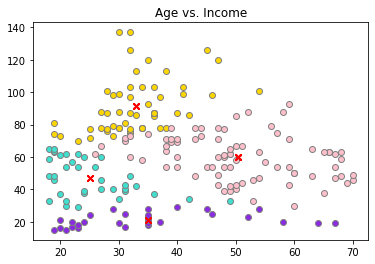

Coord (member data pt): (23, 29) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (21, 30) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (18, 33) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (49, 33) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (21, 33) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (42, 34) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (30, 34) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (36, 37) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (20, 37) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (24, 38) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (31, 39) type: <class 'tuple'>
Guardian centro

Coord (member data pt): (49, 42) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (59, 43) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (50, 43) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (47, 43) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (51, 44) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (69, 44) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (53, 46) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (70, 46) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (67, 47) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (54, 47) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (63, 48) type: <class 'tuple'>
Guardian centro

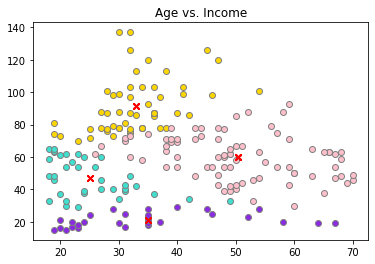

Coord (member data pt): (23, 29) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (21, 30) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (18, 33) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (49, 33) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (21, 33) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (42, 34) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (30, 34) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (36, 37) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (20, 37) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (24, 38) type: <class 'tuple'>
Guardian centroid coords: 25.6 , 37.6
Coord (member data pt): (31, 39) type: <class 'tuple'>
Guardian centro

Coord (member data pt): (32, 137) type: <class 'tuple'>
Guardian centroid coords: 23.200000000000003 , 93.60000000000001
Coord (member data pt): (30, 137) type: <class 'tuple'>
Guardian centroid coords: 23.200000000000003 , 93.60000000000001
Coord (member data pt): (60, 30) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (53, 33) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (65, 38) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (48, 39) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (49, 39) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (50, 40) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (49, 42) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member data pt): (59, 43) type: <class 'tuple'>
Guardian centroid coords: 49.6 , 59.2
Coord (member 

In [ ]:
MAX_ITERATIONS = 10

print(MAX_ITERATIONS)
for i in range(MAX_ITERATIONS):
    clusters = make_clusters(x, y, k, d)
    # Add a function here to pull data points for one centroid at a time - to feed into plot_clusters
    plot_clusters(clusters)
    centers = make_centers(k, clusters)

In [ ]:
print(k_x)
print(clusters)

In [ ]:
#TEST AREA
# colors = ['turquoise', 'blueviolet', 'gold', 'pink']
# i = 0
# for i in range(k):
#     for coord in clusters[k_x[i], k_y[i]]:
#         plt.scatter(coord[0], coord[1], color=colors[i], edgecolor='grey')
#         plt.scatter(centers[i][0], centers[i][1], s= 30, color = 'red', marker='x')

# print('k_x:',k_x[i])
# print('k_y:',k_y[i])
# print(clusters[k_x[i], k_y[i]]) 